<a href="https://colab.research.google.com/github/fiftybucks101/K-Nearest-Neighbour/blob/main/Penguins_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
# Basic info
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [7]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [8]:
# check if null value

df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [9]:
df['sex'].value_counts()

sex
Male      168
Female    165
Name: count, dtype: int64

In [10]:
# since sex is target variable, we will drop all null values in sex column

df = df.dropna(subset=['sex'])
df.reset_index(drop=True,inplace=True)

In [11]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [12]:
# check null values again

df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**Sucessfully dropped all null values**

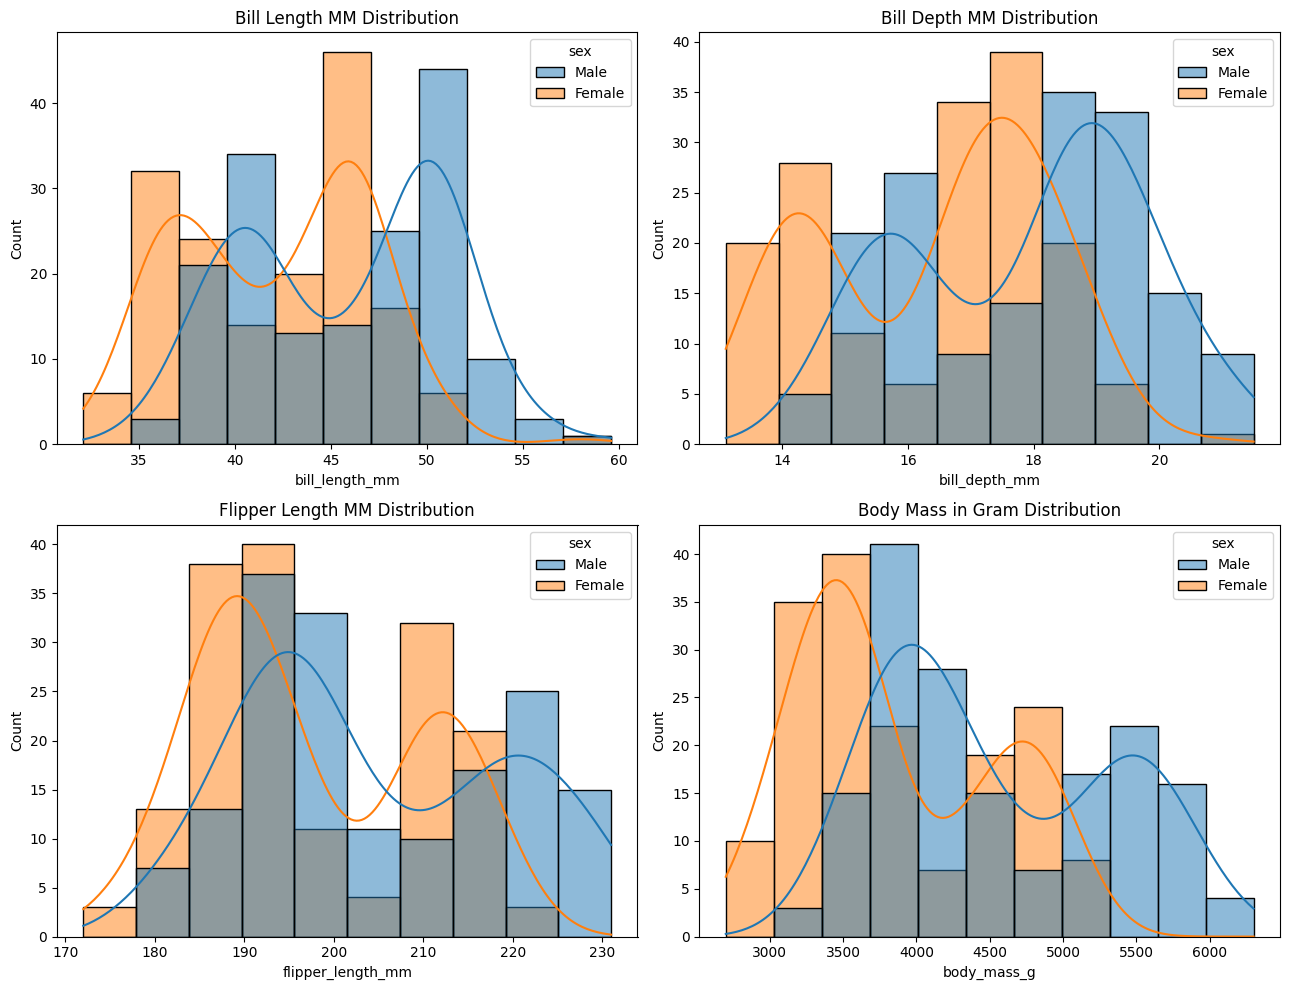

In [13]:
# observe distribution of floating variable

fig, axs = plt.subplots(2,2, figsize=(13,10))

sns.histplot(x=df['bill_length_mm'],kde=True,hue=df['sex'],ax=axs[0,0])
axs[0,0].set_title('Bill Length MM Distribution')
sns.histplot(x=df['bill_depth_mm'],kde=True,hue=df['sex'],ax=axs[0,1])
axs[0,1].set_title('Bill Depth MM Distribution')
sns.histplot(x=df['flipper_length_mm'],kde=True,hue=df['sex'],ax=axs[1,0])
axs[1,0].set_title('Flipper Length MM Distribution')
sns.histplot(x=df['body_mass_g'],kde=True,hue=df['sex'],ax=axs[1,1])
axs[1,1].set_title('Body Mass in Gram Distribution')

plt.tight_layout()

**Insight: In each sector, male penguins tends to have larger value**

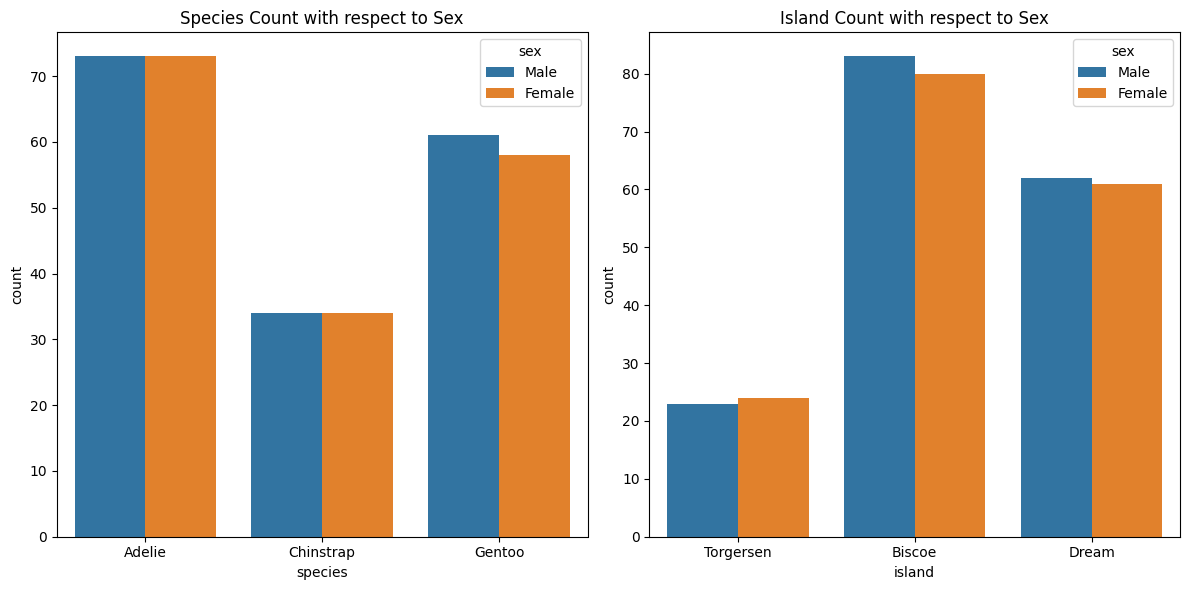

In [14]:
# let's observe value counts of species and island with respect to sex

fig, axs = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x=df['species'],hue=df['sex'],ax=axs[0])
axs[0].set_title('Species Count with respect to Sex')
sns.countplot(x=df['island'],hue=df['sex'],ax=axs[1])
axs[1].set_title('Island Count with respect to Sex')

plt.tight_layout()

**Insights: Since The sex distribution is almost equal in respect to both species and island, we maynot require these independent feature**

In [15]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [16]:
# First we include both species and island as independent feature and observe results

# let's create dummy variables of species and island

species = pd.get_dummies(df['species'],drop_first=True,dtype=int)
island = pd.get_dummies(df['island'],drop_first=True,dtype=int)

In [17]:
df = pd.concat([df,species],axis=1)
df = pd.concat([df,island],axis=1)

In [18]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Chinstrap,Gentoo,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,0,0,1
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,0,0,1
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,0,0,1


In [19]:
df['sex'] = df['sex'].map({'Male':0,'Female':1})
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Chinstrap,Gentoo,Dream,Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0,0,0,0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1,0,0,0,1
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1,0,0,0,1
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0,0,0,0,1


In [20]:
# drop species and island

df = df.drop(columns=['species','island'])

In [21]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Chinstrap,Gentoo,Dream,Torgersen
0,39.1,18.7,181.0,3750.0,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,1
3,36.7,19.3,193.0,3450.0,1,0,0,0,1
4,39.3,20.6,190.0,3650.0,0,0,0,0,1


**Since features value are larger, we scale them using standardscaler**

In [22]:
# First we seperate train and test varible

X = df.drop(columns='sex')
y = df['sex']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [23]:
X_train.shape

(266, 8)

In [24]:
X_test.shape

(67, 8)

In [25]:
# Now we scale X_train and X_test

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [26]:
X_train

array([[-0.59372706, -1.75093934,  0.9359428 , ...,  1.33072662,
        -0.79492254, -0.37633881],
       [-1.26104283,  0.32310698, -0.719956  , ..., -0.75146915,
         1.25798421, -0.37633881],
       [ 1.09309891, -0.63803644,  1.65589881, ...,  1.33072662,
        -0.79492254, -0.37633881],
       ...,
       [-0.81616565,  0.27252048, -0.5759648 , ..., -0.75146915,
        -0.79492254, -0.37633881],
       [ 0.2589542 , -1.0933149 ,  1.36791641, ...,  1.33072662,
        -0.79492254, -0.37633881],
       [-1.11275044, -0.08158499, -1.43991201, ..., -0.75146915,
        -0.79492254, -0.37633881]])

In [27]:
# calculate k hyperparameter using squreroot method

k = np.sqrt(X_train.shape[0])
k = int(k)
k

16

In [28]:
# let's apply KNN machine learning algorithm from sklearn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [29]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1])

In [30]:
# let's see accuracy score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.8955223880597015


In [31]:
print("Classification Report\n\n\n ",classification_report(y_test,y_pred))

Classification Report


                precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.92      0.89      0.90        37

    accuracy                           0.90        67
   macro avg       0.89      0.90      0.89        67
weighted avg       0.90      0.90      0.90        67



In [32]:
print("Confusion Matrix\n\n ",confusion_matrix(y_test,y_pred))

Confusion Matrix

  [[27  3]
 [ 4 33]]


<Axes: >

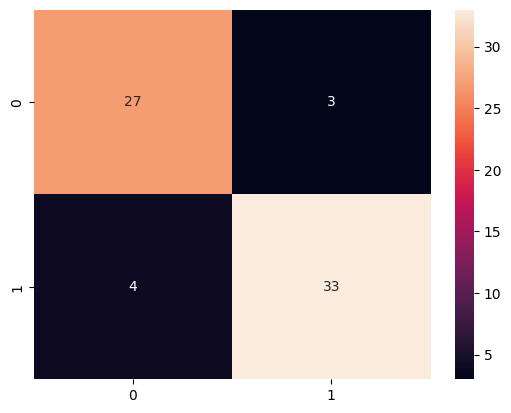

In [33]:
# visualize confusion matrix with heatmap

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [34]:
# let's observe the same process but without independent features species and island

df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [35]:
# since sex is target variable, we will drop all null values in sex column

df = df.dropna(subset=['sex'])
df.reset_index(drop=True,inplace=True)

In [36]:
df = df.drop(columns = ['species','island'])

In [37]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,Male
1,39.5,17.4,186.0,3800.0,Female
2,40.3,18.0,195.0,3250.0,Female
3,36.7,19.3,193.0,3450.0,Female
4,39.3,20.6,190.0,3650.0,Male


In [38]:
df['sex'] = df['sex'].map({'Male':0,'Female':1})

In [39]:
# First we seperate train and test varible

X = df.drop(columns='sex')
y = df['sex']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
# Now we scale X_train and X_test

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [41]:
# calculate k hyperparameter using squreroot method

k = np.sqrt(X_train.shape[0])
k = int(k)
k

16

In [73]:
# let's apply KNN machine learning algorithm from sklearn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k,p=2)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [74]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1])

In [75]:
# let's see accuracy score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.8955223880597015


In [45]:
print("Classification Report\n\n\n ",classification_report(y_test,y_pred))

Classification Report


                precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       0.94      0.86      0.90        37

    accuracy                           0.90        67
   macro avg       0.89      0.90      0.90        67
weighted avg       0.90      0.90      0.90        67



<Axes: >

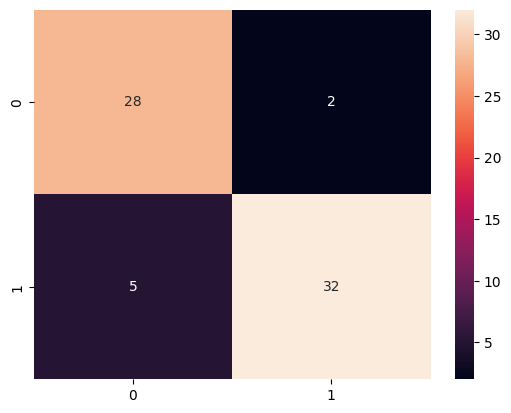

In [46]:
# visualize confusion matrix with heatmap

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

**We can see there is slight changes in the confusion matrix when species and island weren't included. So it is important to consider them since they had a little inequilty with respect to sex**

In [47]:
# now we will observe the same thing but with different K parameters
score = []

for i in range(1,26):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  acc_score = accuracy_score(y_test,knn.predict(X_test))
  score.append(acc_score)

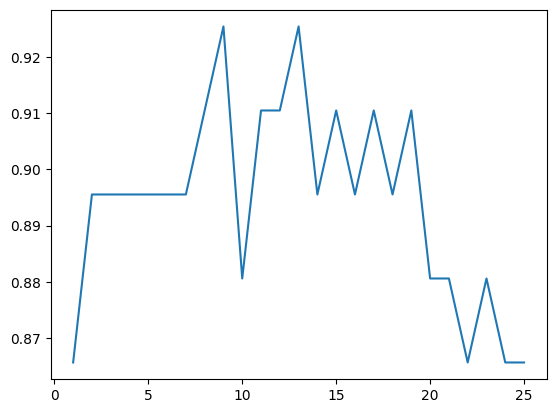

In [48]:
# let's see with visualization

plt.plot(range(1,26),score)

**When k was near 8 and 13 we have maximum accuracty**

In [67]:
knn = KNeighborsClassifier(n_neighbors=13,p=2)
knn.fit(X_train,y_train)
acc_score = accuracy_score(y_test,knn.predict(X_test))
print("Accuracy Score = ",acc_score)

Accuracy Score =  0.9253731343283582


In [69]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
acc_score = accuracy_score(y_test,knn.predict(X_test))
print("Accuracy Score = ",acc_score)

Accuracy Score =  0.9104477611940298


<Axes: >

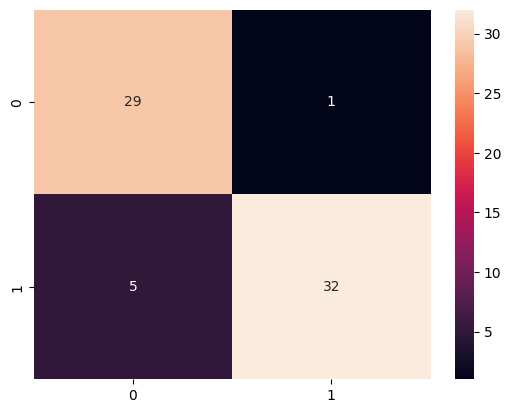

In [51]:
sns.heatmap(confusion_matrix(y_test,knn.predict(X_test)),annot=True)

**We are sucessfully able to increase our accuracy from 0.89 to 0.92 with hyper parameter tuining**

In [54]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
3,36.7,19.3,193.0,3450.0,1
4,39.3,20.6,190.0,3650.0,0


In [64]:
# create a function to predict the output

def predict_output():
  bill_length = int(input("Enter bill length in mm: "))
  bill_depth = int(input("Enter bill depth in mm: "))
  flipper_length = int(input("Enter flipper length in mm: "))
  body_mass = int(input("Enter body mass in gram: "))

  X_new = np.array([[bill_length],[bill_depth],[flipper_length],[body_mass]]).reshape(1,4)

  X_new = ss.transform(X_new)

  if knn.predict(X_new)[0] == 0:
    return "Male Penguin"
  else:
    return "Female Penguin"


In [65]:
predict_output()

Enter bill length in mm: 40
Enter bill depth in mm: 16
Enter flipper length in mm: 199
Enter body mass in gram: 3650


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Female Penguin'